# SIR Model: Glucose Code

In [2]:
#@title
# Import necessary libraries
from os.path import basename, exists
from os import mkdir

def download(url,folder):
    filename = folder + basename(url)
    if not exists(folder):
        mkdir(folder)
    # fetches the file at the given url if it is not already present
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Notebooks/'
        + 'ModSimPy_Functions/modsim.py', 'ModSimPy_Functions/')

from ModSimPy_Functions.modsim import *
import pandas as pd
import numpy as np

Downloaded ModSimPy_Functions/modsim.py


In [3]:

filename = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Data/glucose_insulin.csv'
data = pd.read_csv(filename, index_col='time')

In [4]:
def make_system(params, data):
    G0, k1, k2, k3, dt, Gb, Ib = params.values()
    t_0 = data.index[0]
    t_end = data.index[-1]

    I = interp1d(data.insulin.index,data.insulin.values)
    init = pd.Series(dict(G=G0, X=0),dtype=np.float64)

    system = dict(init=init,
                  k1=k1,k2=k2,
                  k3=k3,dt=dt,
                  Gb=Gb, Ib=Ib, I=I,
                  t_0=t_0, t_end=t_end)
    
    return system


In [5]:
def slope_func(t, state, system):
    G, X = state
    k1, k2, k3, dt = system['k1'],system['k2'], system['k3'], system['dt']
    I, Ib, Gb = system['I'], system['Ib'], system['Gb']
        
    dGdt = -k1 * (G - Gb) - X*G
    dXdt = k3 * (I(t) - Ib) - k2 * X
    
    return dGdt, dXdt

In [6]:
def run_simulation(params, data):
    system = make_system(params,data)
    I = system['I']
    t_array = np.arange(system['t_0'], system['t_end'], system['dt'])
    I_array = I(t_array)
    I_series = pd.Series(data=I_array,index=t_array)
    results, details = run_solve_ivp(system, slope_func,t_eval=t_array)


    results.plot(subplots=True, label='insulin in tissue fluid', xlabel='Time (min)', 
               title='Glucose and Insuline levels', legend=True);
    return

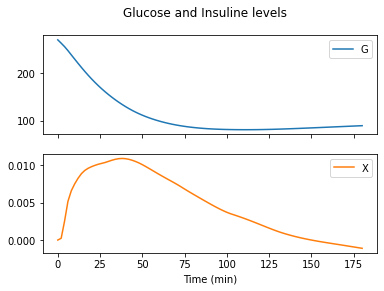

In [7]:
G0 = 270.0; k1 = 0.02; k2 = 0.02; k3 = 1.5e-05; 
dt = 2.0; Gb = 92.0; Ib = 11.0
params = dict(G0=G0, k1=k1, k2=k2, k3=k3, dt=dt, Gb=Gb, Ib=Ib)
run_simulation(params, data)

Here is the code that uploads the rabbit population data for the validation step:

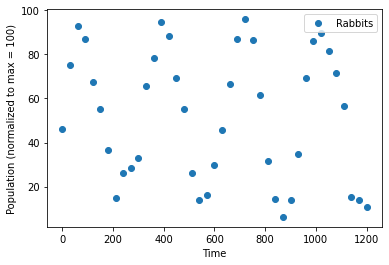

In [14]:
filename = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Data/CT6_Rabbit_data.xlsx'
data = pd.read_excel(filename, header=0,index_col=0)
data.plot(style='o', ylabel='Population (normalized to max = 100)');